In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_pb_h2_combine-varyproposals'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

import pb_h2_combine as parent_script

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/


In [14]:
modelexp_nm = 'modelexp_varyproposals_rs'

df = pd.read_csv(parent_script.out_dir + f'{modelexp_nm}.csv', index_col = 0)
df['R2 overall'] = df['Pearsonr (overall)']**2
df.loc[df['data_readlen'] == 1, 'data_readlen'] = 3
df.loc[df['data_proposal_type'] == 'smart', 'data_proposal_type'] = 'Default'

print(df.columns)
print(df.shape)

df.to_csv(results_dir + f'{modelexp_nm}.csv')

Index(['Int name', 'Random seed', 'Dataset', 'Pearsonr (overall)',
       'TimewiseR count', 'TimewiseR mean', 'TimewiseR std', 'TimewiseR min',
       'TimewiseR 25%', 'TimewiseR 50%', 'TimewiseR 75%', 'TimewiseR max',
       'data_readlen', 'data_num_proposed_gts', 'data_num_groups',
       'data_proposal_type', 'R2 overall'],
      dtype='object')
(606, 17)


## plot

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_pb_h2_combine-varyproposals/modelexp_varyproposals_rs.pdf ...


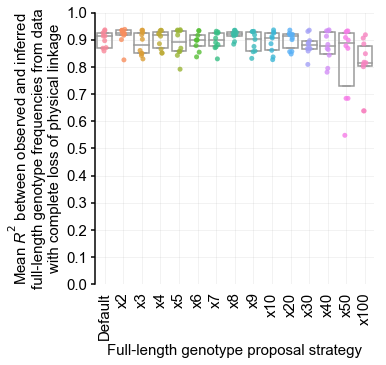

In [15]:
#
import matplotlib
matplotlib.rc('font', family = 'Arial', size = 15)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
#
fig, ax = plt.subplots(figsize = (5, 5))

dfs = df[df['data_readlen'] == 3]
# dfs = dfs[dfs['data_noise'] <= 0.25]

sns.boxplot(
    x = 'data_proposal_type',
    y = 'R2 overall',
    data = dfs,
    color = 'white',
    fliersize = 0,
    ax = ax,
    whis = 0,
)
sns.stripplot(
    x = 'data_proposal_type',
    y = 'R2 overall',
    data = dfs,
    alpha = 0.8,
    ax = ax,
)

sns.despine()
ytick_res = 0.1
plt.yticks(np.arange(0, 1 + ytick_res, ytick_res))
plt.grid(alpha = 0.2)

plt.xlabel('Full-length genotype proposal strategy');
plt.ylabel('Mean $R^2$ between observed and inferred\nfull-length genotype frequencies from data\nwith complete loss of physical linkage');
plt.xticks(rotation = 90);
# locs, labels = plt.xticks()
# updated_labels = [f'{100*float(s.get_text()):.1f}' for s in labels]
# plt.xticks(locs, updated_labels)
# plt.xticks(locs, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12.5, 15, 17.5, 20, 22.5, 25])

##

sns.despine(trim = False, bottom = True)
ax.xaxis.set_ticks_position('none') 
ax.tick_params(length = 4.5, color = 'black', width = 1.5)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1.5)
    ax.spines[axis].set_color('black')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

out_fn = results_dir + f'{modelexp_nm}.pdf'
print(f'Saving to {out_fn} ...')
plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()
##

## stats

In [16]:
agg_df = df.groupby('data_proposal_type')['R2 overall'].describe().reset_index()
display(agg_df)

agg_df.to_csv(results_dir + f'{modelexp_nm}_aggstats.csv')

,data_proposal_type,count,mean,std,min,25%,50%,75%,max
0,Default,40.0,0.933705,0.025709,0.858432,0.926668,0.935656,0.952228,0.963928
1,x10,40.0,0.932236,0.031907,0.826520,0.928172,0.935960,0.949772,0.964682
2,x100,40.0,0.907502,0.077950,0.638072,0.896336,0.935672,0.948634,0.967236
3,x2,40.0,0.934519,0.026772,0.825645,0.925182,0.934442,0.952055,0.963974
4,x20,42.0,0.933633,0.031451,0.847228,0.926322,0.936212,0.959666,0.967497
5,x3,41.0,0.926537,0.036633,0.829188,0.925052,0.932799,0.943670,0.964357
6,x30,42.0,0.931784,0.036126,0.808999,0.931197,0.938946,0.961426,0.967765
7,x4,40.0,0.933850,0.028136,0.850864,0.930156,0.937653,0.949223,0.964246
8,x40,41.0,0.928425,0.043651,0.780433,0.931411,0.936551,0.965355,0.966835
9,x5,40.0,0.924859,0.041125,0.791412,0.930666,0.936140,0.941412,0.965332


## explore

In [13]:
df.head()

,Int name,Random seed,Dataset,Pearsonr (overall),TimewiseR count,TimewiseR mean,TimewiseR std,TimewiseR min,TimewiseR 25%,TimewiseR 50%,TimewiseR 75%,TimewiseR max,data_readlen,data_num_proposed_gts,data_proposal_type,data_num_groups,data_noise,R2 overall
0,0,0,varynoise_smart_rl_1_noise_0.01,0.954253,34.0,0.877657,0.282253,-0.012927,0.952983,0.991658,0.999452,0.999937,3,85,smart,19,0.01,0.910599
1,1,0,varynoise_smart_rl_1_noise_0.02,0.907065,34.0,0.843390,0.295070,0.015286,0.899619,0.985056,0.998758,0.999748,3,112,smart,19,0.02,0.822767
2,2,0,varynoise_smart_rl_1_noise_0.03,0.935059,34.0,0.848210,0.298933,0.079884,0.908562,0.989383,0.997475,0.998610,3,123,smart,19,0.03,0.874336
3,3,0,varynoise_smart_rl_1_noise_0.04,0.930217,34.0,0.856898,0.281963,0.077158,0.926459,0.981854,0.996401,0.998523,3,130,smart,19,0.04,0.865304
4,4,0,varynoise_smart_rl_1_noise_0.05,0.930023,34.0,0.866759,0.242008,0.131120,0.884786,0.980392,0.994598,0.999071,3,148,smart,19,0.05,0.864942


In [18]:
agg_df = df.groupby('data_proposal_type')['data_num_proposed_gts'].describe().reset_index()
display(agg_df)

agg_df.to_csv(results_dir + f'{modelexp_nm}_aggstats_numproposedgts.csv')

,data_proposal_type,count,mean,std,min,25%,50%,75%,max
0,Default,40.0,61.450000,4.573895,54.0,60.0,63.0,64.0,66.0
1,x10,40.0,674.950000,50.312842,593.0,659.0,692.0,703.0,725.0
2,x100,40.0,6210.500000,465.937984,5453.0,6059.0,6362.0,6513.5,6665.0
3,x2,40.0,183.650000,13.888844,161.0,179.0,191.0,192.5,197.0
4,x20,42.0,1288.000000,97.945978,1133.0,1175.0,1322.0,1343.0,1385.0
5,x3,41.0,245.243902,18.287674,215.0,247.0,255.0,255.0,263.0
6,x30,42.0,1901.809524,144.586920,1673.0,1735.0,1952.0,1983.0,2045.0
7,x4,40.0,306.750000,23.148074,269.0,299.0,319.0,321.5,329.0
8,x40,41.0,2515.000000,193.560843,2213.0,2213.0,2623.0,2623.0,2705.0
9,x5,40.0,369.500000,26.789780,323.0,371.0,383.0,386.0,395.0
